In [7]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from image_dataset_loader import load


# train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
# validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


train_data_dir = os.path.dirname("Test test/")


In [8]:

img_width, img_height = 224, 224
batch_size = 16

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True, validation_split=0.2)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 subset="training",
                                                 class_mode='categorical')

# datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        subset="validation",
                                                        class_mode='categorical')


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 816 images belonging to 7 classes.
Found 204 images belonging to 7 classes.


# The Model

In [9]:
def define_VGGmodel():

    model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

    output = Dense(7, activation='softmax')(class1)

    model = Model(inputs=model.inputs, outputs=output)

    #opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

model = define_VGGmodel()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [10]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [11]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator,
 validation_steps=len(validation_generator), epochs=20, verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/20
51/51 [==============================] - 90s 2s/step - loss: 2.2111 - categorical_accuracy: 0.2904 - val_loss: 1.6673 - val_categorical_accuracy: 0.3088
Epoch 2/20
51/51 [==============================] - 89s 2s/step - loss: 1.2416 - categorical_accuracy: 0.5772 - val_loss: 1.5176 - val_categorical_accuracy: 0.5441
Epoch 3/20
51/51 [==============================] - 89s 2s/step - loss: 0.8180 - categorical_accuracy: 0.8027 - val_loss: 1.3627 - val_categorical_accuracy: 0.5196
Epoch 4/20
51/51 [==============================] - 89s 2s/step - loss: 0.5449 - categorical_accuracy: 0.9020 - val_loss: 1.3707 - val_categorical_accuracy: 0.5980
Epoch 5/20
51/51 [==============================] - 90s 2s/step - loss: 0.3789 - categorical_accuracy: 0.9277 - val_loss: 1.2159 - val_categorical_accuracy: 0.5147
Epoch 6/20
51/51 [==============================] - 89s 2s/step - loss: 0.2437 - categorical_accuracy: 0.9853 - val_loss: 1.0083 - val_categorical_accuracy: 0.6127
Epoch 7/20
51/51

In [12]:
print(history.history)

{'loss': [2.211073398590088, 1.2415801286697388, 0.818040132522583, 0.5449289679527283, 0.3788530230522156, 0.2437313050031662, 0.17282024025917053, 0.12890464067459106, 0.09257485717535019, 0.07485289871692657, 0.054715946316719055], 'categorical_accuracy': [0.2904411852359772, 0.5772058963775635, 0.8026960492134094, 0.9019607901573181, 0.9276960492134094, 0.9852941036224365, 0.9950980544090271, 0.9975489974021912, 0.9975489974021912, 0.998774528503418, 1.0], 'val_loss': [1.667330265045166, 1.5176376104354858, 1.3626668453216553, 1.370706558227539, 1.2158886194229126, 1.0082948207855225, 1.1369445323944092, 1.2113219499588013, 1.1012933254241943, 1.1643471717834473, 1.1526318788528442], 'val_categorical_accuracy': [0.30882352590560913, 0.5441176295280457, 0.5196078419685364, 0.5980392098426819, 0.5147058963775635, 0.6127451062202454, 0.5882353186607361, 0.686274528503418, 0.6029411554336548, 0.6470588445663452, 0.6519607901573181]}


# Diagnostic plot

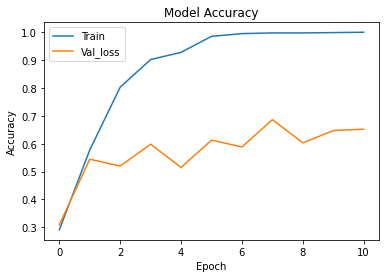

In [13]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

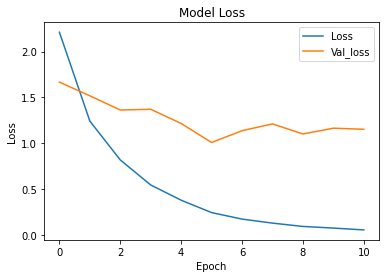

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [15]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
13/13 [==============================] - 18s 1s/step - loss: 1.0083 - categorical_accuracy: 0.6127
accuracy score:  61.274510622024536


In [16]:
# print('Test image - evaluation')
# _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
# print('accuracy score: ', acc*100 )

In [17]:
model.save('model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%')

#model=load_model('vgg15-softmax-classifier_train-91.54_val-72.06_test-83.82%')

INFO:tensorflow:Assets written to: model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%\assets


INFO:tensorflow:Assets written to: model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%\assets


# Testing

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical')

Found 1020 images belonging to 7 classes.


In [22]:
print('Test image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
13/13 [==============================] - 19s 1s/step - loss: 1.0083 - categorical_accuracy: 0.6127
accuracy score:  61.274510622024536


In [23]:

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,validation_generator.classes))

13/13 [==============================] - 20s 2s/step
accuracy:  0.14705882352941177


In [24]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, validation_generator.classes))

Confusion Matrix
[[ 4  4  1  2  3  4  4]
 [ 3  2  1  2  6  4  3]
 [ 4  4  3  0  5  1  6]
 [ 2  3  2  0  3  3  2]
 [ 9  7  5  8  8  9  4]
 [ 2 10  6  3  5  9  4]
 [ 3  6  6  3  6  6  4]]


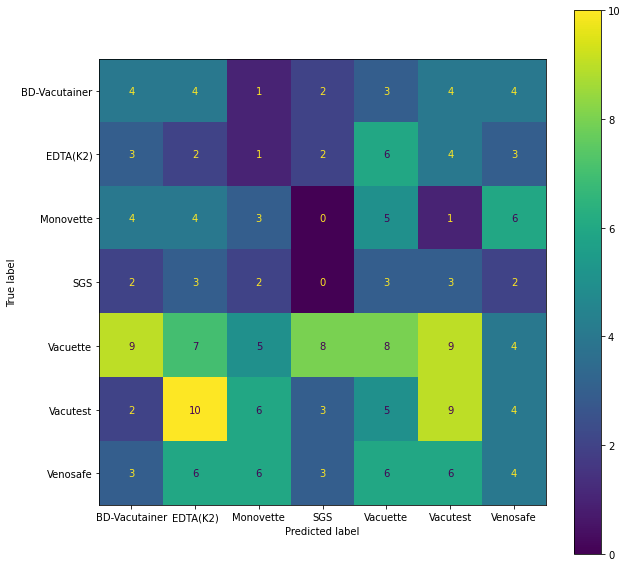

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, validation_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', accuracy_score(y_pred, validation_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, validation_generator.classes, target_names=target_names)) 

Accuracy Score : 0.14705882352941177
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.15      0.18      0.16        22
     EDTA(K2)       0.06      0.10      0.07        21
    Monovette       0.12      0.13      0.13        23
          SGS       0.00      0.00      0.00        15
     Vacuette       0.22      0.16      0.19        50
     Vacutest       0.25      0.23      0.24        39
     Venosafe       0.15      0.12      0.13        34

     accuracy                           0.15       204
    macro avg       0.14      0.13      0.13       204
 weighted avg       0.16      0.15      0.15       204



The Accuracy score is 15.53%, this could be due to the image. One of the plausible issues i can think of that cause such a low accuracy is the fact that maybe tht augmented image has not been since by the model.


#### Test an image


In [ ]:
# model = load_model("classifier_train-99.3_val-91.6_test-88.99%")



In [ ]:

# Y_pred = model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

In [ ]:
# print('Confusion Matrix')
# print(confusion_matrix(y_pred, test_generator.classes))

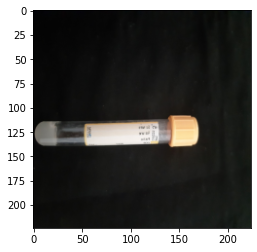

In [27]:
from skimage.transform import resize
img_width, img_height = 224, 224

# Image = plt.imread("output_path/test/BD-Vacutainer/BD-Vacutainer1_small_constrast.jpg")
# Image = plt.imread("output_path/test/EDTA(K2)/EDTA(K2)1_small_flip_vr.jpg")
Image = plt.imread("output_path/test/SGS/SGS1c_small_flip_hr.jpg")


RImage = resize(Image, (img_width, img_height, 3))
img = plt.imshow(RImage)

In [28]:
import numpy as np

predictions = model.predict(np.array( [RImage] ))
predictions

y_pred = np.argmax(predictions, axis=1)

print(y_pred)




1/1 [==============================] - 0s 200ms/step
[5]
